In [49]:
import numpy as np
import sys
import cv2

In [50]:
import matplotlib.pyplot as plt

In [6]:
# return RGB and Grayscale image from a source
def get_image(src="./image/sample/img_01.jpg"):
    im = cv2.imread(src)
    im = cv2.resize(im, (800,600))
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB),cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

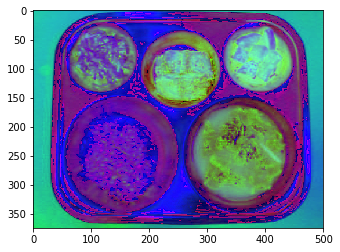

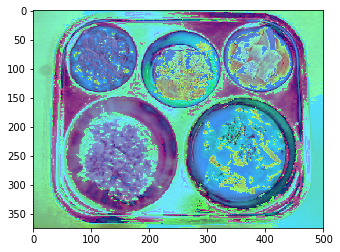

In [51]:
im = cv2.imread("./image/sample/img_01.jpg")
im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
plt.imshow(im)
plt.show()
# # im[:, :, N] where N is the channel you need
# 0=H, 1=S, V=2
# let's try to make saturation + 80
im[:, :, 1] += 80
im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
# reconvert before display
plt.imshow(im)
plt.show()

In [52]:
def augmentation(im, fact=.0):
    if fact > 1:
        fact = 1.0
    # get HSV
    hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    
    # set it to numpy array
    hsv = np.array(hsv)
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,2]
    
    # fact * channel
    hsv[:,:,0] = np.where(h*fact <= 255, fact*h, h)
    hsv[:,:,1] = np.where(s*fact <= 255, fact*s, s)
    hsv[:,:,2] = np.where(v*fact <= 255, fact*v, v)
    
    # return hsv and rgb
    return hsv, cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

In [41]:
im = cv2.imread("./image/sample/img_01.jpg")
hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    
 # set it to numpy array
hsv = np.array(hsv)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]
    
    # fact * channel
hsv[:,:,0] = np.where(h*.0 <= 255, .0*h, h)
hsv[:,:,1] = np.where(s*.0 <= 255, .0*s, s)
hsv[:,:,2] = np.where(v*.0 <= 255, .0*v, v)
im = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

In [112]:
im = cv2.imread("./image/sample/img_02.jpg")

In [139]:
def extract_features(im,
                     threshold=144,
                     ellsize=16,
                     augmentatio=.0,
                     erosion=8,
                     dilatation=4):
    
    hsv, im = augmentation(im, augmentatio)
    gray = cv2.cvtColor(hsv, cv2.COLOR_RGB2GRAY)
    
    # make 2 blurs
    mask = cv2.GaussianBlur(gray, (15,15), 0)
    mask = cv2.GaussianBlur(mask, (3,3), 0)
    
    # create structure element
    ellipses = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ellsize, ellsize))
    
    plt.imshow(ellipses)
    plt.show()
    
    # get 2 masks, one closed to the edges, other makes a
    # kind of dilatation of the first one
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, ellipses)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, ellipses)
    
    # binarize that !
    _, contour = cv2.threshold(mask,
                               threshold,
                               255,
                               cv2.THRESH_BINARY)
    
    plt.imshow(contour)
    plt.show()
    # erode and dilate to get contours
    erode   = cv2.erode(contour, None, iterations=erosion)
    contour = cv2.dilate(erode, None, iterations=dilatation)
    
    plt.imshow(contour)
    plt.show()
    # return the ellipsis and contour image
    # - ellipsis mask is returned 
    # only to visualize what's happend
    return mask, contour

In [114]:
import imutils

In [97]:
imutils.is_cv2()

False

In [98]:
contours[1]

IndexError: list index out of range

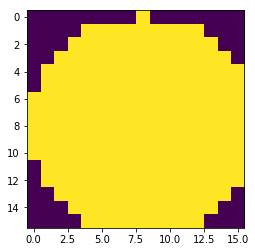

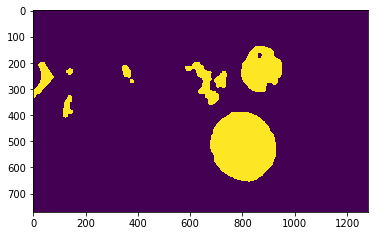

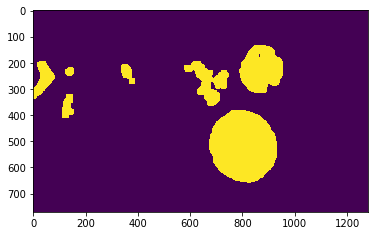

In [140]:

# extract features, that parameters were good enough to
# make some tests
_, mask = extract_features(im, 116, 16, 141, 2, 6)
out = im.copy()
# we need to invert mask
mask = cv2.bitwise_not(mask)
# note that RETR_CHAIN is also usable
contours = cv2.findContours(mask,
                            cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if imutils.is_cv2() else contours[1]


In [141]:
contours

[array([[[757, 383]],
 
        [[758, 382]],
 
        [[811, 382]],
 
        [[812, 383]],
 
        [[818, 383]],
 
        [[819, 384]],
 
        [[827, 384]],
 
        [[828, 385]],
 
        [[830, 385]],
 
        [[831, 386]],
 
        [[832, 386]],
 
        [[833, 387]],
 
        [[834, 387]],
 
        [[835, 388]],
 
        [[837, 388]],
 
        [[838, 389]],
 
        [[840, 389]],
 
        [[841, 390]],
 
        [[843, 390]],
 
        [[844, 391]],
 
        [[845, 391]],
 
        [[849, 395]],
 
        [[850, 395]],
 
        [[851, 396]],
 
        [[854, 396]],
 
        [[855, 397]],
 
        [[858, 397]],
 
        [[859, 398]],
 
        [[861, 398]],
 
        [[863, 400]],
 
        [[864, 400]],
 
        [[865, 401]],
 
        [[866, 401]],
 
        [[868, 403]],
 
        [[869, 403]],
 
        [[884, 418]],
 
        [[885, 418]],
 
        [[887, 420]],
 
        [[888, 420]],
 
        [[894, 426]],
 
        [[894, 427]],
 
        [[895, 4

In [116]:
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [101]:
print(contours[0])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [102]:
type(contours)

tuple

In [103]:
contours.sort_contours(contours[0], method="left-to-right")

AttributeError: 'tuple' object has no attribute 'sort_contours'

In [124]:
type(contours)

NoneType

In [125]:
contours

In [133]:
red = (0,0,255)

In [134]:
# contours = contours.sort()
# loop over the contours
MINWH = 100
for (i, c) in enumerate(contours):
    ((x, y), (w, h), _) = cv2.minAreaRect(c)
    # remove too small regions
    if w > 40 and h > 40:
        x = int(x-w//2)
        y = int(y-h//2)
        w = int(x+w)
        h = int(y+h)
        # draw a box
        out = cv2.rectangle(out, (x, y), (w, h), red, 2)

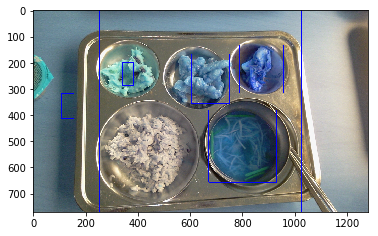

In [136]:
plt.imshow(out)

In [138]:
cv2.imwrite('result2_img_01.png', out)

True